# IA for HumanForYou

L'entreprise de produits pharmaceutiques HumanForYou basée en Inde emploie environ 4000 personnes. Cependant, chaque année elle subit un turn-over d'environ 15% de ses employés nécessitant de retrouver des profils similaires sur le marché de l'emploi.

La direction trouve que ce niveau de turn-over n'est pas bon pour l'entreprise car :

* Les projets sur lesquels étaient les employés quittant la société prennent du retard ce qui nuit à la réputation de l'entreprise auprès de ses clients et partenaires.

* Un service de ressources humaines de taille conséquente doit être conservé car il faut avoir les moyens de trouver les nouvelles recrues.

* Du temps est perdu à l'arrivée des nouveaux employés car ils doivent très souvent être formés et ont besoin de temps pour devenir pleinement opérationnels dans leur nouvel environnement.

Le direction fait donc appel à vous, spécialistes de l'analyse de données, pour déterminer les facteurs ayant le plus d'influence sur ce taux de turn-over et lui proposer des modèles afin d'avoir des pistes d'amélioration pour donner à leurs employés l'envie de rester.

### Données fournies

Un certain nombre de données concernant les employés vous a donc été transmis par le service des ressources humaines.

Il s'agit de fichiers textes au format CSV.

Les données ont été anonymisées : un employé de l'entreprise sera représenté par le même EmployeeID dans l'ensemble des fichiers qui suivent.

### Données du service des ressources humaines

Pour chaque employé, le service des ressources humaines vous confie les informations en sa possession :

 - Age : L'âge de l'employé en 2015.

 - Attrition : L'objet de notre étude, est-ce que l'employé a quitté l'entreprise durant l'année 2016 ?

 - BusinessTravel : A quel fréquence l'employé a été amené à se déplacer dans le cadre de son travail en 2015 ? (Non-Travel = jamais, Travel_Rarely= rarement, Travel_Frequently = fréquemment)

 - DistanceFromHome : Distance en km entre le logement de l'employé et l'entreprise.

 - Education : Niveau d'étude : 1=Avant College (équivalent niveau Bac), 2=College (équivalent Bac+2), 3=Bachelor (Bac+3), 4=Master (Bac+5) et 5=PhD (Thèse de doctorat).

 - EducationField : Domaine d'étude, matière principale

 - EmployeeCount : booléen à 1 si l'employé était compté dans les effectifs en 2015.

 - EmployeeId : l'identifiant d'un employé

 - Gender : Sexe de l'employé

 - JobLevel : Niveau hiérarchique dans l'entreprise de 1 à 5

 - JobRole : Métier dans l'entreprise

 - MaritalStatus : Statut marital du salarié (Célibataire, Marié ou Divorcé).

 - MonthlyIncome : Salaire brut en roupies par mois

 - NumCompaniesWorked : Nombre d'entreprises pour lequel le salarié a travaillé avant de rejoindre HumanForYou.

 - Over18 : Est-ce que le salarié a plus de 18 ans ou non ?

 - PercentSalaryHike : % d'augmentation du salaire en 2015.

 - StandardHours : Nombre d'heures par jour dans le contrat du salarié.

 - StockOptionLevel : Niveau d'investissement en actions de l'entreprise par le salarié.

 - TotalWorkingYears : Nombre d'années d'expérience en entreprise du salarié pour le même type de poste.

 - TrainingTimesLastYear : Nombre de jours de formation en 2015

 - YearsAtCompany : Ancienneté dans l'entreprise

 - YearsSinceLastPromotion : Nombre d'années depuis la dernière augmentation individuelle

 - YearsWithCurrentManager : Nombre d'années de collaboration sous la responsabilité du manager actuel de l'employé.

### Importation des données utiles 

In [1]:
import os
import tarfile
import zipfile
import urllib.request
from six.moves import urllib
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import os

from numpy.random import default_rng
# stabilité du notebook d'une exécution à l'autre
random=default_rng(42) 


DOWNLOAD_ROOT = "https://github.com/Killian-drh/Projet-IA/raw/main/datasets/inoutime/"
INOUTPATH = os.path.join("datasets", "inoutime")
DATA_PATH = "./datasets/"
INOUTIME_URL = DOWNLOAD_ROOT + "in_out_time.zip"

def check_image_folder():
    if not os.path.exists("./images/"):
        os.makedirs("./images/")
        os.makedirs("./images/workflowDS/")
        print ("Images and workflowDS folder has been created")
    elif os.path.exists("./images/"):
        if not os.path.exists("./images/workflowDS/"):
            os.makedirs("./images/workflowDS/")
            print ("WorkflowDS folder has been created")


def fetch_inoutime_data(inoutime_url=INOUTIME_URL, data_path=INOUTPATH):
    in_out_time_check = data_path + "/in_out_time.zip"
    
    if not os.path.isdir(data_path):
        os.makedirs(data_path)
    
    if not os.path.exists(in_out_time_check):
        # Download in_out_time.zip from repo github
        zip_path = os.path.join(data_path, "in_out_time.zip")
        urllib.request.urlretrieve(inoutime_url, zip_path)    
        print ("Download Succeed !")

    # specifying the zip file name 
    file_name = './datasets/inoutime/in_out_time.zip'
    
    in_time_check = os.path.exists("./datasets/inoutime/in_time.csv")
    out_time_check = os.path.exists("./datasets/inoutime/out_time.csv")
    
    if in_time_check==False or out_time_check==False: 
    # opening the zip file in READ mode 
        with zipfile.ZipFile(file_name, 'r') as zip: 
          #  printing all the contents of the zip file 
            zip.printdir() 
  
        # extracting all the files 
            print('Extracting all the files now...') 
            zip.extractall(data_path) 
            print('Done!') 
            
    print("Process succeed")
    
check_image_folder()
fetch_inoutime_data()

def load_data(file, data_path=DATA_PATH):
    csv_path = os.path.join(data_path, file)
    return pd.read_csv(csv_path)

general_data = load_data("general_data.csv")
manager_survey_data = load_data("manager_survey_data.csv")
employee_survey_data = load_data("employee_survey_data.csv")

Process succeed


In [2]:
print(general_data)

      Age  Attrition     BusinessTravel              Department  \
0      51          0      Travel_Rarely                   Sales   
1      31          1  Travel_Frequently  Research & Development   
2      32          0  Travel_Frequently  Research & Development   
3      38          0         Non-Travel  Research & Development   
4      32          0      Travel_Rarely  Research & Development   
...   ...        ...                ...                     ...   
4405   42          0      Travel_Rarely  Research & Development   
4406   29          0      Travel_Rarely  Research & Development   
4407   25          0      Travel_Rarely  Research & Development   
4408   42          0      Travel_Rarely                   Sales   
4409   40          0      Travel_Rarely  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  EmployeeID  \
0                    6          2  Life Sciences              1           1   
1                   10          1  Li

In [3]:
print(manager_survey_data)

      EmployeeID  JobInvolvement  PerformanceRating
0              1               3                  3
1              2               2                  4
2              3               3                  3
3              4               2                  3
4              5               3                  3
...          ...             ...                ...
4405        4406               3                  3
4406        4407               2                  3
4407        4408               3                  4
4408        4409               2                  3
4409        4410               4                  3

[4410 rows x 3 columns]


In [4]:
print(employee_survey_data)

      EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance
0              1                      3.0              4.0              2.0
1              2                      3.0              2.0              4.0
2              3                      2.0              2.0              1.0
3              4                      4.0              4.0              3.0
4              5                      4.0              1.0              3.0
...          ...                      ...              ...              ...
4405        4406                      4.0              1.0              3.0
4406        4407                      4.0              4.0              3.0
4407        4408                      1.0              3.0              3.0
4408        4409                      4.0              1.0              3.0
4409        4410                      1.0              3.0              NaN

[4410 rows x 4 columns]


## Création du code aléatoire
### Jeu de test

In [5]:
# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [6]:
train_set, test_set = split_train_test(general_data, 0.2)
print(len(train_set), "train +", len(test_set), "test")

3528 train + 882 test


#### Utilisation d'une fonction hachage

In [7]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_set, test_set = train_test_split(general_data, test_size=0.5, random_state=42) 

In [10]:
#SOLUTION
test_set.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1413,49,0,Non-Travel,Research & Development,23,1,Other,1,1414,Female,...,1.0,Y,19,8,1,7.0,5,7,1,7
3352,27,0,Travel_Rarely,Research & Development,1,3,Medical,1,3353,Male,...,1.0,Y,14,8,1,1.0,5,1,0,0
3970,35,0,Non-Travel,Sales,10,1,Life Sciences,1,3971,Female,...,2.0,Y,18,8,3,15.0,3,7,1,7
3629,52,1,Travel_Rarely,Research & Development,3,2,Technical Degree,1,3630,Male,...,9.0,Y,19,8,1,10.0,1,8,7,7
144,30,0,Travel_Rarely,Sales,5,4,Medical,1,145,Female,...,0.0,Y,17,8,1,6.0,2,5,4,4


In [11]:
general_data["DFH_cat"] = np.ceil(general_data["DistanceFromHome"]/1.5)
general_data["DFH_cat"].where(general_data["DFH_cat"] < 30, inplace=True) # replace where false

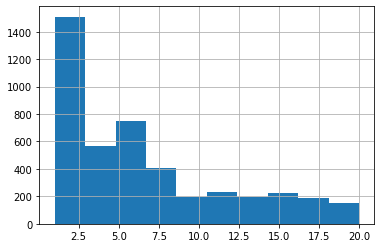

In [12]:
general_data["DFH_cat"].hist()

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for train_index, test_index in split.split(general_data, general_data["DFH_cat"]):
    print(train_index, test_index) # 1 seul tour de boucle si n_splits = 1
    strat_train_set = general_data.loc[train_index]
    strat_test_set = general_data.loc[test_index]

[3919 1811 3045 ... 1143 2018 3511] [ 459 1042  363 ... 2656 3314  528]


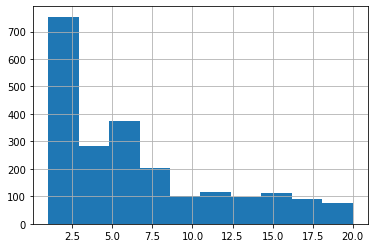

In [14]:
strat_test_set["DFH_cat"].hist()

In [15]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("DFH_cat", axis=1, inplace=True) #SOLUTION

In [16]:
strat_train_set

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
3919,32,1,Travel_Rarely,Research & Development,26,3,Medical,1,3920,Female,...,6.0,Y,13,8,2,10.0,3,0,0,0
1811,36,0,Travel_Rarely,Research & Development,2,3,Life Sciences,1,1812,Male,...,4.0,Y,14,8,1,8.0,3,5,0,4
3045,33,1,Travel_Rarely,Human Resources,28,2,Human Resources,1,3046,Female,...,1.0,Y,21,8,1,1.0,3,1,0,0
4332,31,0,Travel_Rarely,Sales,2,5,Life Sciences,1,4333,Male,...,8.0,Y,11,8,0,7.0,3,4,0,2
3446,28,0,Travel_Rarely,Research & Development,10,3,Other,1,3447,Male,...,1.0,Y,15,8,0,1.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914,30,0,Travel_Rarely,Sales,3,4,Marketing,1,1915,Male,...,5.0,Y,14,8,1,10.0,3,8,7,7
2551,22,1,Travel_Rarely,Research & Development,16,2,Life Sciences,1,2552,Female,...,1.0,Y,19,8,3,1.0,3,1,0,0
1143,55,0,Travel_Rarely,Sales,9,3,Marketing,1,1144,Male,...,4.0,Y,15,8,1,35.0,3,10,1,4
2018,52,0,Travel_Rarely,Sales,1,3,Life Sciences,1,2019,Male,...,7.0,Y,18,8,1,18.0,6,8,4,0


### Explorer le jeu de données

Notre jeu de test étant constitué, nous pouvons commencer l'exploration. Nous allons travailler sur une copie du jeu d'entraînement pour éviter toute mauvaise surprise.

In [17]:
general_data_cp = strat_train_set.copy()

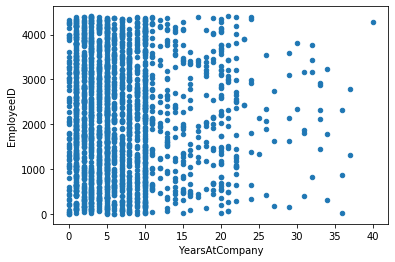

In [18]:
general_data_cp.plot(kind="scatter", x="YearsAtCompany", y="EmployeeID")

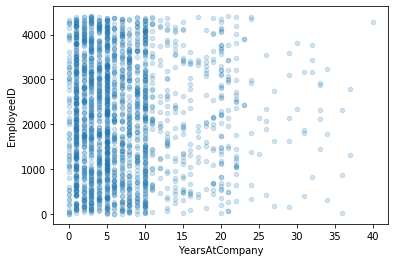

In [19]:
general_data_cp.plot(kind="scatter", x="YearsAtCompany", y="EmployeeID", alpha=0.2)

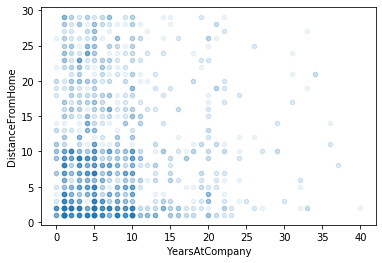

In [20]:
general_data_cp.plot(kind="scatter", x="YearsAtCompany", y="DistanceFromHome", alpha=0.08)

#### Recherche de corrélation

Les variables d'un jeu de données peuvent être liées deux à deux (plus ou moins fortement, positivement ou négativement), c'est pourquoi on calcule leur [corrélation](https://fr.wikipedia.org/wiki/Corr%C3%A9lation_(statistiques)).

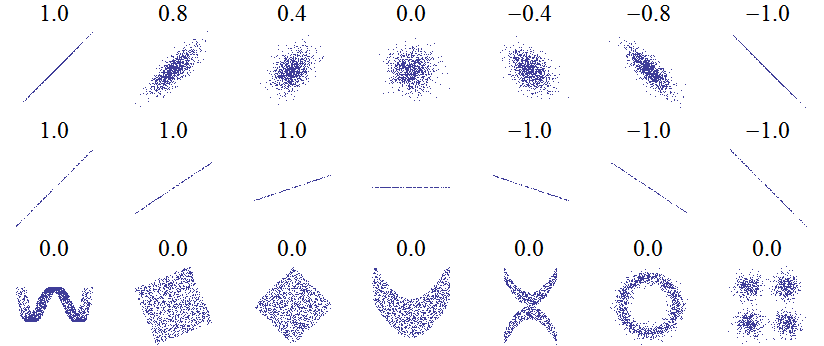

In [21]:
from IPython.display import Image
Image("https://upload.wikimedia.org/wikipedia/commons/0/02/Correlation_examples.png")

In [22]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "workflowDS"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID) # le dossier doit exister

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure scatter_matrix_plot


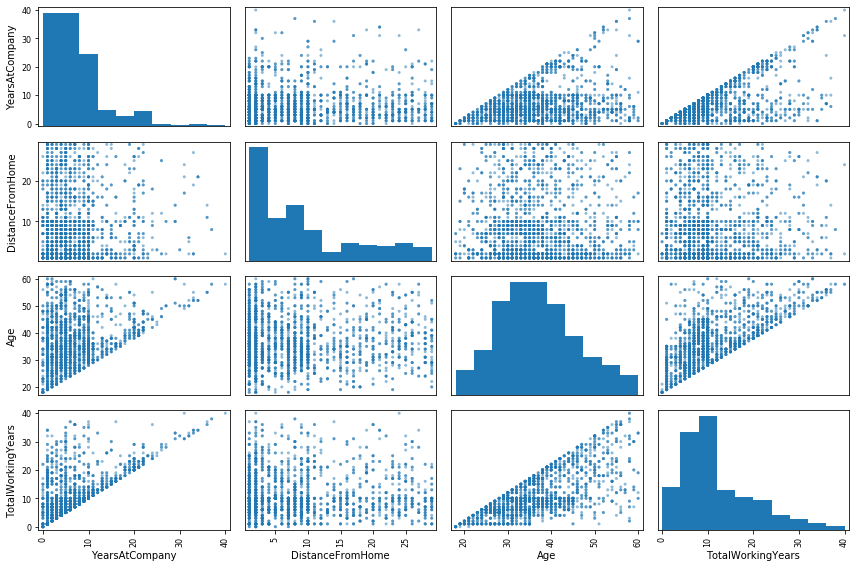

In [23]:
from pandas.plotting import scatter_matrix

attributes = ["YearsAtCompany", "DistanceFromHome", "Age",
              "TotalWorkingYears"]
scatter_matrix(general_data_cp[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

In [24]:
import seaborn as sns
import numpy as np

sns.set_theme()

#plt.rcParams['figure.figsize'] = (30.0, 15.0)
#plt.rcParams['font.family'] = "serif"

df = pd.read_csv("./datasets/general_data.csv", encoding='utf-8')
df1 = df[['DistanceFromHome','YearsAtCompany','Attrition']]
print (df1.head())

# pandas pivot
heatmap1_data = pd.pivot_table(df1, values='Attrition',
                     index=['DistanceFromHome'], 
                     columns='YearsAtCompany')

f, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(heatmap1_data, annot=True, linewidths=0.3, ax=ax)

AttributeError: module 'seaborn' has no attribute 'set_theme'

In [ ]:
sns.displot(heatmap1_data)